In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Duality

In this problem we look at the primal and dual problems for simple cases and get insights into duality

## Helper functions 

In [3]:
## DO NOT MODIFY THIS CODE
# Wrapper function to get primal functions
def get_primal(subpart):
    if subpart == 0:
        x = np.linspace(-2, 8, 100)
        return x, get_primal_lp(x), get_p_opt_lp(x), get_primal_constraint_lp()
    elif subpart == 1:
        x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
        X, Y = np.meshgrid(x, y)
        return X, Y, get_primal_e(X, Y), get_primal_constraint_e(x, y), get_p_opt_e(np.linspace(0, 10, 100))
    elif subpart == 2:
        x = np.linspace(-5, 5, 100)
        return
    else:
        print("Subpart must be 0, 1, or 2.")

# Wrapper function to get dual functions
def get_dual(subpart):
    if subpart == 0:
        lam = np.linspace(-2, 8, 100)
        dual_constraints = get_dual_constraints_lp()
        return lam, get_dual_lp(lam), dual_constraints
    elif subpart == 1:
        lam = np.linspace(10**-10, 4, 100)
        return lam, get_dual_e(lam)
    elif subpart == 2:
        return
    else:
        print("Subpart must be 0, 1, or 2.")
        
# Helper function for plotting. Do not change this function.
def visualize(subpart):
    p = get_primal(subpart)
    d = get_dual(subpart)
    if subpart == 0: # 1d primal and dual variables
        (lam, dual, dual_constraints) = d
        x, primal, p_opt, primal_constraint = p
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = [12,6])
        ax1.plot(x, primal, color="b", label=r'$f(x)$')
        ax1.plot(x, p_opt, color="k", linestyle="dotted", label=r'$p^* = 6$')
        ax1.axvspan(-2, primal_constraint, alpha=0.5, facecolor="r")
        ax1.set_xlim([-2, 8])
        ax1.legend(loc="upper left")
        ax1.set_title("Primal")
        ax1.set_xlabel(r'$x$')
        ax1.set_ylabel(r'$f(x)$')
       
    
        ax2.plot(lam, dual, color="g", label=r'$g(\lambda)$')
        ax2.plot(x, p_opt, color="k", linestyle="dotted", label=r'$p^* = 6$')
#         ax2.plot(dual_constraints[0], dual_constraints[1], color="y")
        ax2.axvspan(-2, dual_constraints[0], alpha=0.5, facecolor="r")
        ax2.axvspan(dual_constraints[1], 8, alpha=0.5, facecolor="r")

        ax2.legend(loc="upper left")
        ax2.set_title("Dual")
        ax2.set_xlabel(r'$\lambda$')
        ax2.set_ylabel(r'$g(\lambda)$')
 
    elif subpart == 1: # 2d primal variables
        (lam, dual) = d
        X, Y, primal, primal_constraint, p_opt = p
        plt3d = plt.figure().gca(projection='3d')
        plt3d.plot_surface(X, Y, primal_constraint, alpha=.2, color = 'red')
        ax = plt.gca()
        ax.contour3D(X, Y, primal, 50, cmap='binary')
        ax = plt.gca()
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$f(x,y)$')
        ax.set_title("Primal")
        
        fig2, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize = [12,6])
        
        x = np.linspace(0, 2, 100)
        ax1.set_title(r'Cross section: $f(x,y)$ s.t. $x + y = 1$')
        ax1.plot(x, np.exp(x) + np.exp(1-x), label=r'$f(x,y)$')
        ax1.plot(x, p_opt, color="k", linestyle="dotted", label=r'$p^*$')
        ax1.set_xlabel(r'$x$')
        ax1.legend(loc="upper right")
        
        ax2.set_title(r'Cross section: $f(x,y)$ s.t. $y = \frac{1}{2}$')
        ax2.plot(x, np.exp(x) + np.exp(.5), label=r'$f(x,y)$')
        ax2.plot(x, p_opt, color="k", linestyle="dotted", label=r'$p^*$')
        ax2.axvspan(0, .5, alpha=0.5, facecolor="r")
        ax2.set_xlabel(r'$x$')
        ax2.legend(loc="upper right")
        
        ax3.plot(lam, dual, label=r'$g(\lambda)$')
        ax3.plot(lam, p_opt, color="k", linestyle="dotted", label=r'$p^*$')
        ax3.set_title("Dual")
        ax3.set_xlabel(r'$\lambda$')
        ax3.legend(loc="upper right")
        
    elif subpart == 2:
        return
    else:
        print("Subpart must be 0, 1, or 2.")
    plt.legend()

## Problem (1):  A Linear program

### Problem formulation
Consider the problem of minimizing a linear objective subject to a linear constraint. Suppose $a$ is a positive scalar.

\begin{aligned}
p^\ast =& \min_{x \geq 0 } ax \\
\text{s.t. }& x \geq b.
\end{aligned}

We consider the case where $a = 2$ and $b = 3$. In this case clearly the optimal primal solution is $x^* = 3$ and $p^* = 6$.

### Constructing the primal  

In [4]:
## DO NOT MODIFY THIS CODE
a = 2
b = 3

##Get primal for plottting
def get_primal_lp(x):
    """ x: array of scalars """
    return np.multiply(x, a)

def get_p_opt_lp(x):
    """ 
    Used for plotting the optimal value p*.
    Input:
    Output:
    """
    return [a*b for _ in x]

def get_primal_constraint_lp():
    """
    Used for plotting feasible x region
    """
    return b

### We can formulate the dual problem for the LP which involves maximizing $g(\lambda_1, \lambda_2)$ where $\lambda_1$ is the dual variable corresponding to the constraint $x \geq 3$ and $\lambda_2$ is the dual variable corresponding to the constraint $x \geq 0$. Then, we solve it to obtain $d^*$.

The Lagrangian is given by,
\begin{aligned}
\mathcal L (x,\lambda_1, \lambda_2) &= 2x + \lambda_1(-x+3) + \lambda_2(-x) \\
&= x(2 - \lambda_1 - \lambda_2) + 3\lambda_1 .
\end{aligned}
Then for $\lambda_1 \geq 0$, $\lambda_2 \geq 0$,
\begin{aligned}
g(\lambda_1, \lambda_2) = \inf\limits_{x} \mathcal L (x, \lambda_1, \lambda_2).
\end{aligned}
Observe that if $\lambda_1 + \lambda_2 \neq 2$ then $g(\lambda_1, \lambda_2)$ will be $-\infty$, attained by taking $x$ to $\infty$ or $-\infty$.

Therefore, the dual problem is

\begin{aligned}
d^\ast =& \max_{\lambda_1 \geq 0, \lambda_2 \geq 0 } 3 \lambda_1 \\
\text{s.t. }& \lambda_1 + \lambda_2 = 2.
\end{aligned}

To maximize $3\lambda_1$ we should set $\lambda_1 = 2$ and $\lambda_2 = 0$. This gives us $d^* = 6$. 

##### Next we will consider the Lagrangian only with respect to the constrain $x \geq 3$ and form the dual problem. 

### We formulate the dual problem for the LP which involves maximizing $g(\lambda)$ where $\lambda$ is the dual variable corresponding to the constraint $x \geq 3$. Then, we compare the dual problem to that of the previous part.

Similar to the previous part, the Lagrangian is

\begin{aligned}
\mathcal L (x,\lambda) &= 2x + \lambda(-x+3)\\
&= x(2 - \lambda) + 3\lambda.
\end{aligned}

The dual problem is given by

\begin{aligned}
d^\ast =& \max_{\lambda \geq 0 } \min_{x \geq 0} x(2 - \lambda) + 3\lambda.
\end{aligned}

Note that if $2 - \lambda < 0, g(\lambda) = -\infty$, attained by taking $x$ to $\infty$. Therefore, the optimal $\lambda^*$ must satisfy $\lambda \leq 2$, and $x$ must be $0$.

That is, the dual problem simplifies to

\begin{aligned}
d^\ast =& \max_{\lambda \geq 0 } 3 \lambda \\
\text{s.t. }& \lambda \leq 2.
\end{aligned}

Note that while this dual problem appears different from that of the previous part, we can eliminate $\lambda_2$ using the equality and the inequality constraint on $\lambda_2$. Thus the two problems are essentially the same. 

**For problem without strong duality:** Note that if strong duality does not hold it need not always be true, that the dual problem obtained by dualizing different constraints are equivalent. For example consider the following optimization problem,

\begin{aligned}
p^\ast =& \min_{x \geq 0 } x^3 \\
\text{s.t. }& x \geq 1.
\end{aligned}

The problem is not convex since the objective function, $x^3$, is not convex. As an ungraded (and fun!)  exercise that is not part of the homework, formulate the dual problem and compare the dual optimal values  for the following 2 cases: <br>
1) Form the dual only with respect to constraint $x \geq 1$ <br>
2) Form the dual with respect to both constraints, $x \geq 0$ and $x \geq 1$.


### Fill in the get_dual_lp function and get_dual_constraints function based on the dual problem:

\begin{aligned}
d^\ast =& \max_{\lambda \geq 0 } 3 \lambda \\
\text{s.t. }& \lambda \leq 2.
\end{aligned}

In [5]:
### Constructing the dual

def get_dual_lp(lam):
    """
    The objective function of the dual problem. Takes in lam and evaluate g(lam).
    Input: lam: array of scalars representing dual variable
    Output: g(lam): function value can be computed using variables of the linear program
    """
    
    return np.multiply(lam, b) 



def get_dual_constraints_lp():
    """
    Get the bounds of the constraints that limit the feasible set of the dual variable.
    Output: Return two floats, lam_low, lam_high so that the dual variable is
    constrained as lam_low <= lam <= lam_high
    """

    lam_low = 0
    lam_high = 2
    
    return lam_low, lam_high

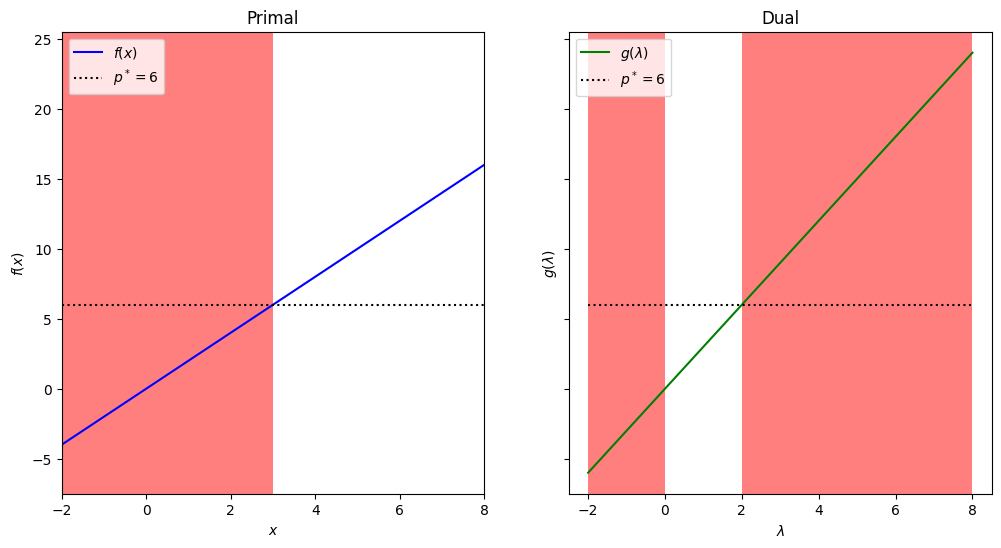

In [6]:
visualize(0)

### <font color='red'>TODO:</font>
#### <font color='red'> Based on the visualization of the primal and dual problem, where red region denotes region of infeasibility, what is the dual optimal solution $\lambda^*$? Does strong duality hold? <br>

#### <font color='blue'> We see that for feasible $\lambda$ the dual function is maximized at $\lambda^* = 2$ and $g(2) = 6 = p^*$, thus strong duality holds.
</font>

## Problem (2): Minimizing exponentials in $\mathbb{R}^2$

### Problem formulation

Consider the following problem, where $z = [x,y]$ is the two-dimensional primal variable.
\begin{aligned}
    p^\ast =& \min_{x,y} e^x + e^y \\
    \text{s.t. }& x + y \geq 1.
\end{aligned}

### We first solve the primal problem to get $p^*$ and  primal optimal solutions $x^*, y^*$.

Since objective function is increasing in both $x$ and $y$ the optimal solution must satisfy $x + y = 1$. If $(x, y)$ satisifies strict inequality with respect to constraint then we can decrease either $x$ or $y$ while not violating constraint and simultaneously decrease objective value.

Substituting for $y = 1-x$ and differentiating with respect to $x$ we obtain $x^* = 0.5$ which gives us $y^* = 0.5$ and $p^* = 2e^{0.5} \approx 3.3$.

### Constructing the primal  

In [6]:
def get_primal_e(x, y):
    """ x, y: arrays of scalars """
    return np.add(np.exp(x), np.exp(y))

def get_primal_constraint_e(x, y):
    return np.reshape(x + y - 1, [-1,1])

def get_p_opt_e(x):
    """ Used for plotting the optimal value p*. """   
    return [2 * np.exp(.5) for _ in x] 

### <font color='red'>TODO:</font>
#### <font color='red'> Does Slater's condition hold? Is the problem convex? Does strong duality hold?</font>


#### <font color='blue'> We can find a strictly feasible point (x,y) = (1,1) that lies in interior of domain of the objective function thus Slater's condition holds. The problem is convex since the objective function is convex (can check that Hessain is p.s.d) and the inequality constraint is affine. Since Slater's condition holds and the problem is convex strong duality holds. 
</font>



### Next, we formulate the dual problem for the minimizing exponentials problem, which involves maximizing $g(\lambda)$ where $\lambda$ is the dual variable corresponding to the constraint $x + y \geq 1$.

After deriving $g(\lambda)$, we find that the dual problem is given by

\begin{aligned}
d^\ast =& \max_{\lambda} \lambda(3 - 2 \ln \lambda) \\
\text{s.t. }& \lambda \geq 0.
\end{aligned}


### Fill in the get_dual_lp function  function based on the given dual problem

In [7]:
def get_dual_e(lam):
    """ 
    The objective function of the dual problem.
    lam: array of scalars 
    """
    
    return np.multiply(lam, 3 - 2 * np.log(lam))



def get_dual_constraints_e():
    return (0,5)

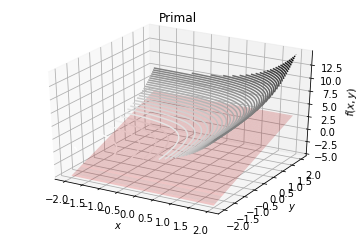

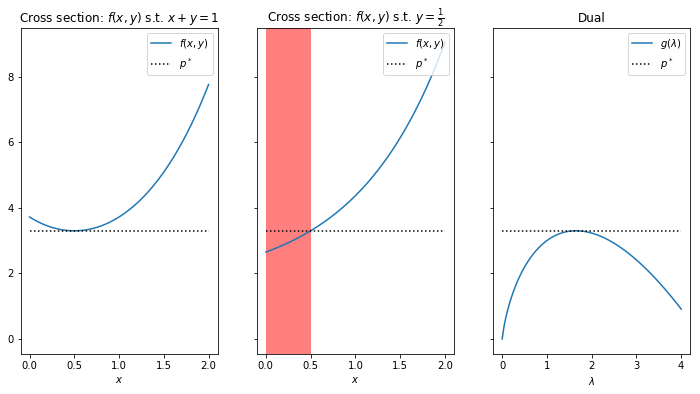

In [8]:
visualize(1)

### <font color='red'>TODO:</font>
#### <font color='red'> Is the dual optimal value $d^*$ equal to $p*$?</font>
#### <font color='blue'> First note that while the primal problem was over $x \in \mathbb{R}^2$ the dual problem is over scalar variable $\lambda \in \mathbb{R}$. Further the dual objective function $g(\lambda)$ is concave and can be maximized by simply setting derivative of $g(\lambda)$ with respect to $\lambda$ to 0. Thus it is much easier to solve the dual problem as compared to the primal problem. By appealing to Slater's condition and observing that the problem was convex we know that strong duality holds so once we solve the dual for $d^*$ we know $p^*$.
</font>